# PR-0019-Retinopathy

Retinopathy refers to damage or disease of the retina, the light-sensitive tissue at the back of the eye responsible for vision. It can lead to vision problems and, in severe cases, blindness. Retinopathy is often associated with systemic conditions like diabetes and high blood pressure, which affect the blood vessels in the retina.
## Objective
**Modelling**: Create a model that can detect the type of retinopathy

**Evaluation Metrics**: Recall, F1-Score, AUC  

## Import libraries

In [6]:
# core libraries
import os
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
df = pd.read_csv("data_all.csv")

# Drop unnecessary index column
df.drop(columns=['Unnamed: 0'], inplace=True)

df.head()

,file,cat
0,o_c1t10003118.jpg,1
1,o_c1t1003016260.jpg,1
2,o_c1t1004522299.jpg,1
3,o_c1t1008823172.jpg,1
4,o_c1t1011431188.jpg,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    1764 non-null   object
 1   cat     1764 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.7+ KB


In [ ]:
df.isnull().sum()

file    0
cat     0
dtype: int64

## Class Distribution

In [ ]:
class_counts = df['cat'].value_counts().sort_index()
class_counts

cat
1    811
2    569
3    384
Name: count, dtype: int64

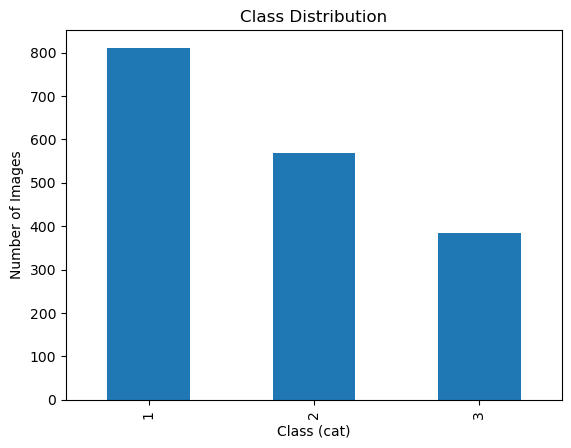

In [ ]:
plt.figure()
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class (cat)")
plt.ylabel("Number of Images")
plt.show()

### Percentage distribution per class

In [ ]:
(class_counts / len(df)) * 100

cat
1    45.975057
2    32.256236
3    21.768707
Name: count, dtype: float64

## Image Dimension Analysis

In [ ]:
image_sizes = []

for img_name in df['file'].sample(200):  # sample for speed
    img = Image.open(os.path.join(IMAGE_DIR, img_name))
    image_sizes.append(img.size)  # (width, height)

In [ ]:
sizes_df = pd.DataFrame(image_sizes, columns=['width', 'height'])
sizes_df.describe()

,width,height
count,200.000000,200.000000
mean,808.620000,703.050000
std,107.762421,122.314848
min,604.000000,543.000000
25%,757.000000,607.000000
50%,849.000000,646.000000
75%,899.000000,900.000000
max,899.000000,900.000000


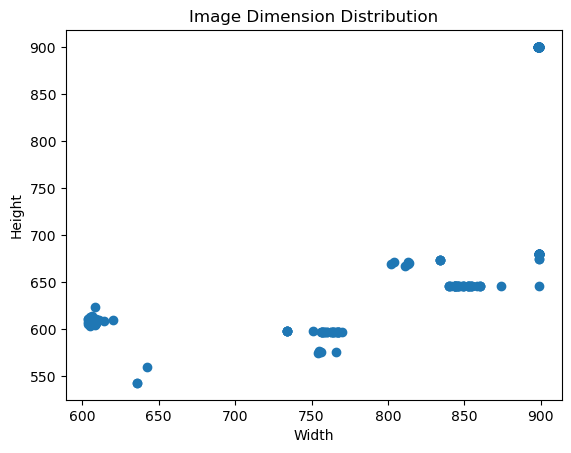

In [ ]:
plt.figure()
plt.scatter(sizes_df['width'], sizes_df['height'])
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Dimension Distribution")
plt.show()

## One sample Image per class

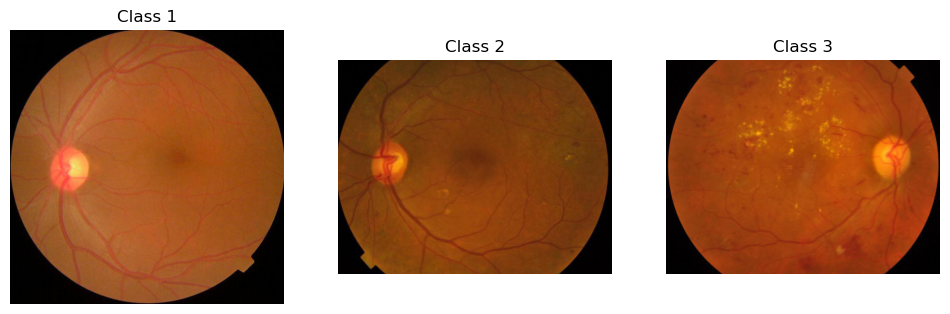

In [ ]:
unique_classes = sorted(df['cat'].unique())

plt.figure(figsize=(12, 4))

for i, label in enumerate(unique_classes):
    sample_img = df[df['cat'] == label]['file'].iloc[0]
    img = Image.open(os.path.join(IMAGE_DIR, sample_img))

    plt.subplot(1, len(unique_classes), i + 1)
    plt.imshow(img)
    plt.title(f"Class {label}")
    plt.axis('off')

plt.show()

## Train-Val-Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df['file']
y = df['cat']

X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

In [10]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

In [11]:
print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))

Train size: 1234
Validation size: 265
Test size: 265


In [12]:
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation class distribution:")
print(y_val.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train class distribution:
cat
1    0.459481
2    0.322528
3    0.217990
Name: proportion, dtype: float64

Validation class distribution:
cat
1    0.460377
2    0.320755
3    0.218868
Name: proportion, dtype: float64

Test class distribution:
cat
1    0.460377
2    0.324528
3    0.215094
Name: proportion, dtype: float64


In [20]:
train_df['cat'] = train_df['cat'].astype(str)
val_df['cat']   = val_df['cat'].astype(str)
test_df['cat']  = test_df['cat'].astype(str)

In [ ]:
train_df.head()

,file,cat
1754,o_c3t97463648.jpg,3
113,o_c1t139628323.jpg,1
1100,o_c2t243121767.jpg,2
1706,o_c3t636814201.jpg,3
610,o_c1t3219229901.jpg,1


#### Creates a ZIP archive of the chest_xray_clahe folder to upload to google drive and use it inside colab

In [ ]:
import shutil

shutil.make_archive(
    base_name="images",
    format="zip",
    root_dir=".",
    base_dir="images")

'C:\\Users\\wwwsa\\OneDrive\\Desktop\\PR-0019-Retinopathy\\images.zip'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/images.zip -d /content/

Archive:  /content/drive/MyDrive/images.zip
   creating: /content/images/
  inflating: /content/images/o_c1t10003118.jpg  
  inflating: /content/images/o_c1t1003016260.jpg  
  inflating: /content/images/o_c1t1004522299.jpg  
  inflating: /content/images/o_c1t1008823172.jpg  
  inflating: /content/images/o_c1t1011431188.jpg  
  inflating: /content/images/o_c1t10124484.jpg  
  inflating: /content/images/o_c1t1017812937.jpg  
  inflating: /content/images/o_c1t1019068.jpg  
  inflating: /content/images/o_c1t1019917974.jpg  
  inflating: /content/images/o_c1t102131695.jpg  
  inflating: /content/images/o_c1t102325801.jpg  
  inflating: /content/images/o_c1t102695169.jpg  
  inflating: /content/images/o_c1t1028112842.jpg  
  inflating: /content/images/o_c1t1038819527.jpg  
  inflating: /content/images/o_c1t1042232268.jpg  
  inflating: /content/images/o_c1t1045127711.jpg  
  inflating: /content/images/o_c1t1048226326.jpg  
  inflating: /content/images/o_c1t1055731995.jpg  
  inflating: /cont

## Modelling

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [15]:
IMAGE_DIR = "images"
IMG_SIZE = (224, 224)   # ResNet50 standard
BATCH_SIZE = 32
NUM_CLASSES = train_df['cat'].nunique()

In [16]:
NUM_CLASSES

3

####  Data augmentation was used to improve generalization and reduce overfitting in retinal image classification.

In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

In [18]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

The training data was loaded using a Keras data generator that dynamically feeds augmented images and corresponding labels to the model.

In [21]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=IMAGE_DIR,
    x_col="file",
    y_col="cat",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)


Found 1234 validated image filenames belonging to 3 classes.


In [22]:
val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=IMAGE_DIR,
    x_col="file",
    y_col="cat",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 265 validated image filenames belonging to 3 classes.


In [23]:
test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=IMAGE_DIR,
    x_col="file",
    y_col="cat",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Found 265 validated image filenames belonging to 3 classes.


In [24]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [25]:
for layer in base_model.layers:
    layer.trainable = False

In [26]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(NUM_CLASSES, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [27]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [28]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [29]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['cat']),
    y=train_df['cat']
)

class_weight_dict = dict(enumerate(class_weights))
class_weight_dict


{0: np.float64(0.7254556143445032),
 1: np.float64(1.033500837520938),
 2: np.float64(1.5291201982651796)}

In [30]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 46s 833ms/step - accuracy: 0.3028 - loss: 1.3743 - val_accuracy: 0.2189 - val_loss: 1.1332
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 494ms/step - accuracy: 0.3199 - loss: 1.2860 - val_accuracy: 0.2604 - val_loss: 1.0989
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 521ms/step - accuracy: 0.3062 - loss: 1.2320 - val_accuracy: 0.4604 - val_loss: 1.0742
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 516ms/step - accuracy: 0.3244 - loss: 1.1932 - val_accuracy: 0.4604 - val_loss: 1.0714
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 522ms/step - accuracy: 0.3325 - loss: 1.1543 - val_accuracy: 0.4604 - val_loss: 1.0779
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 494ms/step - accuracy: 0.3318 - loss: 1.1351 - val_accuracy: 0.3283 - val_loss: 1.0908
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 527ms/step - accuracy: 0.3612 - loss: 1.1054 - val_accuracy: 0.2189 - val_loss: 1.1053
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 499ms/step - accuracy: 0.3033 - loss: 1.1184 - val_accu

In [31]:
for layer in base_model.layers[-30:]:
    layer.trainable = True

In [32]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [34]:
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict
)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 531ms/step - accuracy: 0.7098 - loss: 0.6706 - val_accuracy: 0.6302 - val_loss: 0.6482
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 503ms/step - accuracy: 0.6900 - loss: 0.6925 - val_accuracy: 0.6491 - val_loss: 0.9298
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 519ms/step - accuracy: 0.7057 - loss: 0.6805 - val_accuracy: 0.5849 - val_loss: 1.1302
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 515ms/step - accuracy: 0.7039 - loss: 0.6522 - val_accuracy: 0.7132 - val_loss: 0.6868
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 512ms/step - accuracy: 0.7098 - loss: 0.6743 - val_accuracy: 0.6943 - val_loss: 0.7872
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 523ms/step - accuracy: 0.6829 - loss: 0.6731 - val_accuracy: 0.7472 - val_loss: 0.6203
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 20s 509ms/step - accuracy: 0.7025 - loss: 0.6806 - val_accuracy: 0.7358 - val_loss: 0.6043
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 533ms/step - accuracy: 0.6954 - loss: 0.6490 - val_accu

In [35]:
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.7594 - loss: 0.5641
Test Accuracy: 0.7433962225914001


In [36]:
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(test_generator)

# Convert probabilities → class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 520ms/step


In [37]:
class_labels = list(test_generator.class_indices.keys())
class_labels

['1', '2', '3']

## Evaluation

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

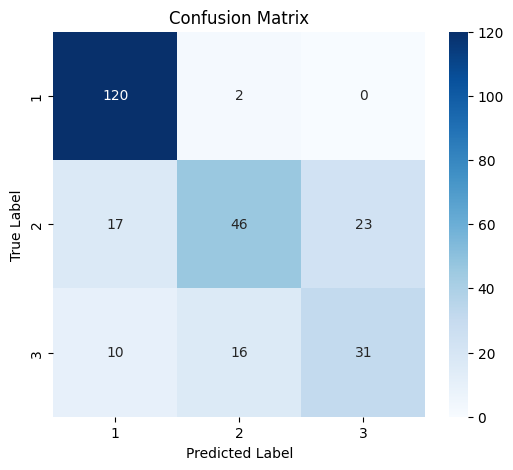

In [39]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [40]:
from sklearn.metrics import classification_report

report = classification_report(
    y_true,
    y_pred,
    target_names=class_labels
)

print(report)


              precision    recall  f1-score   support

           1       0.82      0.98      0.89       122
           2       0.72      0.53      0.61        86
           3       0.57      0.54      0.56        57

    accuracy                           0.74       265
   macro avg       0.70      0.69      0.69       265
weighted avg       0.73      0.74      0.73       265



The model achieves an overall accuracy of 74%, with strong performance on Class 1 (high recall of 0.98), indicating effective detection of this category. However, performance on Classes 2 and 3 is comparatively lower, with reduced recall and F1-scores, suggesting class imbalance and visual similarity between these classes. The gap between macro-average and weighted-average scores highlights uneven class-wise performance, indicating scope for improvement through enhanced data augmentation, class-specific weighting, or fine-tuning deeper network layers.

## Saving the model

In [43]:
model.save("resnet50_retinopathy_model.keras")

## Conclusion

In this project, a deep learning–based approach was developed to classify retinal images for retinopathy detection using transfer learning. A ResNet50 model pretrained on ImageNet was employed along with domain-specific data augmentation and class weighting to address limited data and class imbalance. The model achieved an overall accuracy of 74%, demonstrating strong performance in detecting certain retinopathy classes, while also highlighting challenges in distinguishing visually similar classes. The results indicate that transfer learning is effective for retinal image analysis, and further improvements can be achieved through advanced architectures, enhanced preprocessing, and additional fine-tuning. Overall, this project validates the applicability of deep learning techniques in automated retinopathy screening systems.

## Future works

Explore advanced architectures such as EfficientNet or Vision Transformers to improve classification accuracy.

Apply lesion-focused preprocessing techniques (e.g., CLAHE or vessel enhancement) to enhance retinal feature visibility.

Incorporate Grad-CAM–based model explainability to support clinical interpretability and trust.

Address class imbalance further using focal loss or synthetic data generation techniques.

Extend the system to a real-time clinical screening tool by integrating the model into a web or mobile application.